In [5]:
import jax

In [6]:
from league.run_league import get_all_agent_loaders, get_hp, evaluate_these_agent_combinations
hp = get_hp(debug_mode=False, batch_size=1, trace_length=50)
_, named_agent_loaders = get_all_agent_loaders(hp)

In [7]:
print(named_agent_loaders.keys())

dict_keys(['loqa_2i4vsulp', 'loqa_2ynm2tt3', 'loqa_2zgb3k1q', 'loqa_3islgbi7', 'loqa_3r9977xr', 'loqa_20htxiyc', 'loqa_30j2wrur', 'loqa_31zh1lui', 'loqa_37u1bq3f', 'loqa_233m1v5f', 'pola_new_0', 'pola_new_1', 'pola_new_2', 'pola_new_3', 'pola_new_4', 'pola_new_5', 'pola_new_6', 'pola_new_7', 'pola_new_8', 'pola_new_9', 'loqa_rb_ablation_1abkzsx3', 'loqa_rb_ablation_1tieobkn', 'loqa_rb_ablation_2xndvhhp', 'loqa_rb_ablation_2zpspi7d', 'loqa_rb_ablation_3kfuinhg', 'loqa_rb_ablation_3o6xocrm', 'loqa_rb_ablation_3tocppgh', 'loqa_rb_ablation_375wzono', 'loqa_rb_ablation_d3g7n3wp', 'loqa_rb_ablation_ejpsvuwk', 'loqa_sp_ablation_1ecqpbed', 'loqa_sp_ablation_2ntyuzde', 'loqa_sp_ablation_3cfm0yd6', 'loqa_sp_ablation_3cfulper', 'loqa_sp_ablation_16qp3f50', 'loqa_sp_ablation_20gama5k', 'loqa_sp_ablation_60m01f0h', 'loqa_sp_ablation_aehjqk0o', 'loqa_sp_ablation_dqoxc4wd', 'loqa_sp_ablation_q9u2wcx2', 'mfos_42', 'mfos_43', 'mfos_44', 'mfos_45', 'mfos_46', 'mfos_47', 'mfos_48', 'mfos_49', 'mfos_50', 

In [86]:
agent1_name = 'loqa_2i4vsulp'
agent2_name = 'loqa_2i4vsulp'
agent1_loader = named_agent_loaders[agent1_name]
agent2_loader = named_agent_loaders[agent2_name]
results, episode_logs = evaluate_these_agent_combinations(combinations=[(agent1_loader, agent2_loader)],
                                  batch_size=1,
                                  rng=jax.random.PRNGKey(42),
                                  hp=hp,
                                  for_instead_of_vmap=False,)

loqa_2i4vsulp vs loqa_2i4vsulp:
t: 0 time passed: 12.534210205078125
t: 1 time passed: 24.324239253997803
t: 2 time passed: 35.17712903022766
t: 3 time passed: 46.06133818626404
t: 4 time passed: 56.867451190948486
t: 5 time passed: 67.65268397331238
t: 6 time passed: 78.87765097618103
t: 7 time passed: 89.7091121673584
t: 8 time passed: 101.3824713230133
t: 9 time passed: 112.91689491271973
t: 10 time passed: 123.67712616920471
t: 11 time passed: 134.33768391609192
t: 12 time passed: 145.09842920303345
t: 13 time passed: 156.15355110168457
t: 14 time passed: 167.1472930908203
t: 15 time passed: 178.06982016563416
t: 16 time passed: 188.79031825065613
t: 17 time passed: 199.87929010391235
t: 18 time passed: 210.5575020313263
t: 19 time passed: 221.3583071231842
t: 20 time passed: 232.5380461215973
t: 21 time passed: 243.4936990737915
t: 22 time passed: 254.25515818595886
t: 23 time passed: 264.7939052581787
t: 24 time passed: 275.5654683113098
t: 25 time passed: 286.33645510673523
t: 2

In [34]:
episodes = episode_logs[(agent1_name, agent2_name)][0]

In [122]:
import jax
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import io


def buffer_plot_and_get(fig):
    t = time.time()
    buf = io.BytesIO()
    fig.savefig(buf, bbox_inches='tight', dpi=80)
    plt.close()
    buf.seek(0)
    image = Image.open(buf)
    print(f'opening took {time.time() - t}')
    return image


def arrow_end_coords(start_x, start_y, action, arrow_length):
    end_x, end_y = start_x, start_y

    if action == 0:  # LEFT
        end_x -= arrow_length
    elif action == 1:  # RIGHT
        end_x += arrow_length
    elif action == 2:  # UP
        end_y -= arrow_length
    elif action == 3:  # DOWN
        end_y += arrow_length

    return end_x, end_y


def plot_game(game, ax, info=None):
    t = time.time()
    width = game['games'].WIDTH
    height = game['games'].HEIGHT
    coin_position = game['coin_pos'][0], game['coin_pos'][1]
    coin_owner = game['coin_owner']
    player1_pos = game['player1_pos'][0], game['player1_pos'][1]
    player2_pos = game['player2_pos'][0], game['player2_pos'][1]
    # set the position of the coin
    coin_x = coin_position[1]
    coin_y = coin_position[0]
    player1_y = player1_pos[0]
    player1_x = player1_pos[1]
    player2_y = player2_pos[0]
    player2_x = player2_pos[1]
    player1_action = game['act'][0]
    player2_action = game['act'][1]

    # create a figure and axis object  
    ax.clear()
        
    # loop over the board and add the squares to the plot
    for i in range(height):
        for j in range(width):
            ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=False, color='black', linewidth=3.))

    # add the coin to the plot
    if coin_owner == 0:
        ax.add_patch(plt.Circle((coin_x + 0.8, coin_y + 0.8), 0.2, fill=True, color='red'))
    elif coin_owner == 1:
        ax.add_patch(plt.Circle((coin_x + 0.8, coin_y + 0.8), 0.2, fill=True, color='blue'))

    # load the player images
    player1_img = mpimg.imread('/Users/miladaghajohari/PycharmProjects/extramodels/assets/player_1.png')
    player2_img = mpimg.imread('/Users/miladaghajohari/PycharmProjects/extramodels/assets/player_2.png')
    # red player
    ax.imshow(player1_img, extent=[player1_x, player1_x + 0.4, player1_y, player1_y + 0.4], alpha=1.0)
    ax.text(player1_x + 0.2, player1_y + 0.6, int(game['rew'][0]), color="black", ha="center", va="center", fontsize=30)
    # blue player
    ax.imshow(player2_img, extent=[player2_x + 0.6, player2_x + 1.0, player2_y, player2_y + 0.4], alpha=1.0)
    ax.text(player2_x + 0.8, player2_y + 0.6, int(game['rew'][1]), color="black", ha="center", va="center", fontsize=30)

    # Draw arrow for player 1's action
    arrow_length = 0.2
    arrow_width = 0.05
    arrow_start_x = player1_x + 0.2
    arrow_start_y = player1_y + 0.3
    arrow_end_x, arrow_end_y = arrow_end_coords(arrow_start_x, arrow_start_y, player1_action, arrow_length)

    ax.arrow(arrow_start_x, arrow_start_y, arrow_end_x - arrow_start_x, arrow_end_y - arrow_start_y,
             head_width=arrow_width, head_length=arrow_width, fc='red', ec='purple', linewidth=3.)

    # Draw arrow for player 2's action
    arrow_start_x = player2_x + 0.8
    arrow_start_y = player2_y + 0.3
    arrow_end_x, arrow_end_y = arrow_end_coords(arrow_start_x, arrow_start_y, player2_action, arrow_length)

    ax.arrow(arrow_start_x, arrow_start_y, arrow_end_x - arrow_start_x, arrow_end_y - arrow_start_y,
             head_width=arrow_width, head_length=arrow_width, fc='blue', ec='purple', linewidth=3.)

    # set the limits of the plot
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)

    # hide the ticks and axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    if info:
        time_step = info['time_step']
        agent1_name = info['agent1']
        agent2_name = info['agent2']
        # ax.set_title(f'ًًRed:{agent1_name} vs. Blue:{agent2_name} | t: {time_step}',
        #      fontsize=24, color='#34495e', fontweight='bold', fontname='Arial', 
        #      backgroundcolor='white', pad=10)
        x_center = 0.5
        y_position = 1.05 
        ax.text(x_center - 0.2, y_position, f'{agent1_name}', color='red', ha='right', va='bottom', transform=ax.transAxes, size=20)
        ax.text(x_center - 0.1, y_position, 'vs. ', color='black', ha='center', va='bottom', transform=ax.transAxes, size=20)
        ax.text(x_center + 0., y_position, f'{agent2_name}', color='blue', ha='left', va='bottom', transform=ax.transAxes, size=20)
        ax.text(x_center + 0.2, y_position, f'| t : {time_step}', color='black', ha='left', va='bottom', transform=ax.transAxes, size=20)


    print(f'took {time.time() - t}.')
    return fig


took 0.05212092399597168.


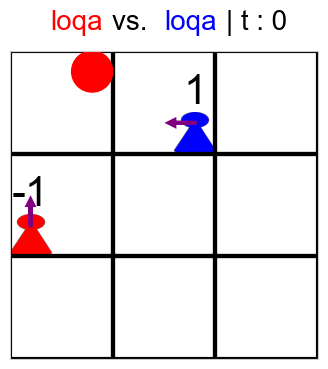

In [124]:
episode = jax.tree_map(lambda x: x[0], episodes)
t = 0
game = jax.tree_map(lambda x: x[t], episode)
fig, ax = plt.subplots(figsize=(4, 4))
img = plot_game(game, ax=ax, info={'time_step': 0, 'agent1': 'loqa', 'agent2': 'loqa'})

took 0.08039402961730957.
took 0.061179161071777344.
took 0.1362287998199463.
took 0.05474400520324707.
took 0.05901288986206055.
took 0.058984994888305664.
took 0.18194890022277832.
took 0.27181005477905273.
took 0.13611078262329102.
took 0.08236908912658691.
took 0.0994880199432373.
took 0.08034825325012207.
took 0.06539487838745117.
took 0.06639289855957031.
took 0.1022489070892334.
took 0.059419870376586914.
took 0.06839609146118164.
took 0.05605602264404297.
took 0.06247878074645996.
took 0.055716753005981445.
took 0.07378268241882324.
took 0.09779000282287598.
took 0.06734085083007812.
took 0.052549123764038086.
took 0.27958083152770996.
took 0.0801241397857666.
took 0.09662413597106934.
took 0.07621622085571289.
took 0.08266496658325195.
took 0.10850119590759277.
took 0.16106867790222168.
took 0.09863400459289551.
took 0.07920289039611816.
took 0.07930493354797363.
took 0.08124589920043945.
took 0.0571138858795166.
took 0.07824897766113281.
took 0.0610048770904541.
took 0.059967

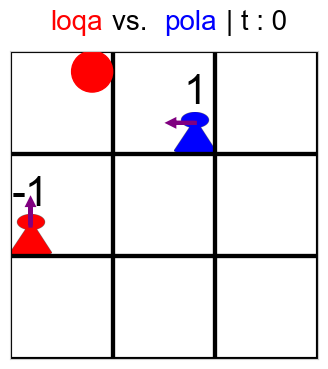

In [125]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set up the figure
fig, ax = plt.subplots(figsize=(4, 4))

def update(frame):
    t = frame
    game = jax.tree_map(lambda x: x[t], episode)
    ax.clear()
    plot_game(game, ax=ax, info={'time_step': t,
                                 'agent1': 'loqa',
                                 'agent2': 'pola'})
    return ax

ani = animation.FuncAnimation(fig, update, frames=range(51), blit=False)

# To display the animation in a Jupyter notebook
HTML(ani.to_jshtml())

# Or to save the animation as a video file
ani.save('./game_animation.mp4', writer='ffmpeg', fps=1)